In [2]:
# Importamos las librerias



from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import KFold

from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt

# Librerías para manejo de datos
import pandas as pd
import numpy as np
np.random.seed(8)

# Para preparar los datos
from sklearn.preprocessing import LabelEncoder

# Para crear el arbol de decisión, KNN, hiperparametros y balanceo
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split

# Para evaluar el modelo
from sklearn.metrics import  accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV

# Para la validación cruzada
from sklearn.model_selection import KFold

#Librerías para la visualización
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns
from sklearn import tree
from sklearn.tree import plot_tree

# Datos

In [29]:
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

In [24]:
data = pd.read_excel('TrainClass.xlsx')
real_data = pd.read_excel('TestClass.xlsx')

In [31]:
Y, X = data['FRACASO'], data.drop(['FRACASO', 'CODIGO_EMPRESA'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X = real_data.drop(['CODIGO_EMPRESA'], axis=1)

In [32]:
print(f'Resample dataset % {Counter(Y_train)}')



Resample dataset % Counter({0: 1379, 1: 59})


# Arbol de Decisión

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

In [35]:
# Crear el objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Entrenar el modelo de arbol de decisión con los datos de entrenamiento
arbol = arbol.fit(X_train, Y_train)

# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(X_test)

In [44]:
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)

print("----------------------------------------------")
print(classification_report(Y_train, y_pred_train))
print("----------------------------------------------")
print(classification_report(Y_test, y_pred_test))


Exactitud sobre entrenamiento: 1.00
Exactitud sobre test: 0.94
----------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1379
           1       1.00      1.00      1.00        59

    accuracy                           1.00      1438
   macro avg       1.00      1.00      1.00      1438
weighted avg       1.00      1.00      1.00      1438

----------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       349
           1       0.08      0.09      0.08        11

    accuracy                           0.94       360
   macro avg       0.52      0.53      0.53       360
weighted avg       0.94      0.94      0.94       360



In [46]:
importancia= arbol.feature_importances_
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,B21,0.218207
1,B61,0.061253
2,B23,0.059634
3,B66,0.056804
4,B24,0.052374
5,B62,0.048892
6,B81,0.046664
7,B68,0.044321
8,B63,0.043957
9,B32,0.038704


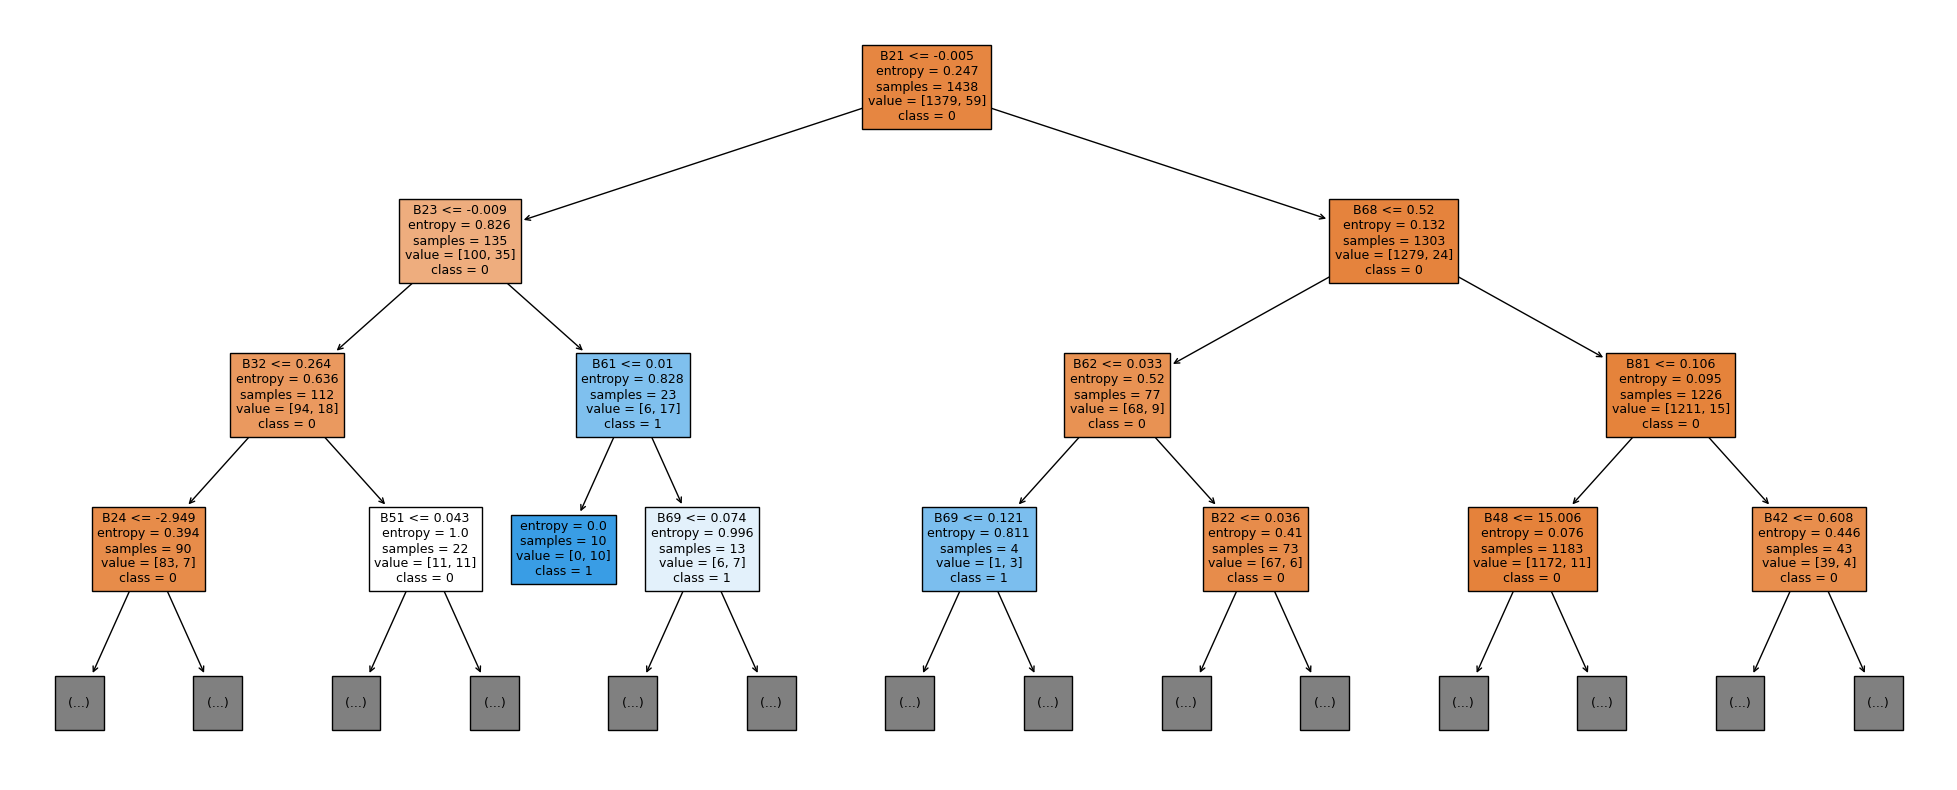

In [50]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

In [53]:
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

print("----------------------------------------------")

print(classification_report(Y_train, y_pred_train))

print("----------------------------------------------")

print(classification_report(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 1.00
Exactitud sobre test: 0.97
----------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1379
           1       1.00      1.00      1.00        59

    accuracy                           1.00      1438
   macro avg       1.00      1.00      1.00      1438
weighted avg       1.00      1.00      1.00      1438

----------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       349
           1       0.40      0.18      0.25        11

    accuracy                           0.97       360
   macro avg       0.69      0.59      0.62       360
weighted avg       0.96      0.97      0.96       360



In [54]:
importancia= rfc.feature_importances_
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,B47,0.062692
1,B46,0.060951
2,B67,0.044899
3,B24,0.040831
4,B45,0.037533
5,B22,0.035932
6,B21,0.033879
7,B44,0.031831
8,B31,0.029880
9,B68,0.028383


# KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
)

In [62]:
clf = clf.fit(X_train, Y_train)
clf_pred = clf.predict(X_test)

In [63]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

print("----------------------------------------------")

print(classification_report(Y_train, y_pred_train))

print("----------------------------------------------")

print(classification_report(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.97
Exactitud sobre test: 0.97
----------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1379
           1       0.93      0.24      0.38        59

    accuracy                           0.97      1438
   macro avg       0.95      0.62      0.68      1438
weighted avg       0.97      0.97      0.96      1438

----------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       349
           1       1.00      0.09      0.17        11

    accuracy                           0.97       360
   macro avg       0.99      0.55      0.58       360
weighted avg       0.97      0.97      0.96       360



# Ridge Classifier

In [69]:
from sklearn.linear_model import RidgeClassifier

In [70]:
clf = RidgeClassifier().fit(X_train, Y_train)

In [71]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

print("----------------------------------------------")

print(classification_report(Y_train, y_pred_train))

print("----------------------------------------------")

print(classification_report(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.97
Exactitud sobre test: 0.97
----------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1379
           1       1.00      0.25      0.41        59

    accuracy                           0.97      1438
   macro avg       0.98      0.63      0.69      1438
weighted avg       0.97      0.97      0.96      1438

----------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       349
           1       1.00      0.09      0.17        11

    accuracy                           0.97       360
   macro avg       0.99      0.55      0.58       360
weighted avg       0.97      0.97      0.96       360



# Gradient Boosting Classifier

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)

0.9722222222222222

In [76]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

print("----------------------------------------------")

print(classification_report(Y_train, y_pred_train))

print("----------------------------------------------")

print(classification_report(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.97
Exactitud sobre test: 0.97
----------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1379
           1       1.00      0.19      0.31        59

    accuracy                           0.97      1438
   macro avg       0.98      0.59      0.65      1438
weighted avg       0.97      0.97      0.96      1438

----------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       349
           1       0.67      0.18      0.29        11

    accuracy                           0.97       360
   macro avg       0.82      0.59      0.64       360
weighted avg       0.97      0.97      0.96       360



# Bagging

In [85]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [94]:
bagging = BaggingClassifier(RandomForestClassifier())
bagging.fit(X_train, Y_train)

BaggingClassifier(estimator=RandomForestClassifier())

In [95]:
y_pred_train = bagging.predict(X_train)
y_pred_test = bagging.predict(X_test)

print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

print("----------------------------------------------")

print(classification_report(Y_train, y_pred_train))

print("----------------------------------------------")

print(classification_report(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.99
Exactitud sobre test: 0.96
----------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1379
           1       1.00      0.64      0.78        59

    accuracy                           0.99      1438
   macro avg       0.99      0.82      0.89      1438
weighted avg       0.99      0.99      0.98      1438

----------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       349
           1       0.33      0.18      0.24        11

    accuracy                           0.96       360
   macro avg       0.65      0.59      0.61       360
weighted avg       0.95      0.96      0.96       360



In [96]:
from sklearn.neural_network import MLPClassifier

In [98]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [99]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

print("----------------------------------------------")

print(classification_report(Y_train, y_pred_train))

print("----------------------------------------------")

print(classification_report(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.98
Exactitud sobre test: 0.97
----------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1379
           1       0.90      0.46      0.61        59

    accuracy                           0.98      1438
   macro avg       0.94      0.73      0.80      1438
weighted avg       0.97      0.98      0.97      1438

----------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       349
           1       0.50      0.09      0.15        11

    accuracy                           0.97       360
   macro avg       0.74      0.54      0.57       360
weighted avg       0.96      0.97      0.96       360



# Votting

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [105]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
  scores = cross_val_score(clf, X_train, Y_train, scoring='recall', cv=5)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.17 (+/- 0.05) [Logistic Regression]
Accuracy: 0.24 (+/- 0.15) [Random Forest]
Accuracy: 0.31 (+/- 0.16) [naive Bayes]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.27 (+/- 0.15) [Ensemble]


# Ada Boost

In [106]:
from sklearn.ensemble import AdaBoostClassifier

In [107]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [108]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

print("----------------------------------------------")

print(classification_report(Y_train, y_pred_train))

print("----------------------------------------------")

print(classification_report(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.99
Exactitud sobre test: 0.97
----------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1379
           1       1.00      0.83      0.91        59

    accuracy                           0.99      1438
   macro avg       1.00      0.92      0.95      1438
weighted avg       0.99      0.99      0.99      1438

----------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       349
           1       0.40      0.18      0.25        11

    accuracy                           0.97       360
   macro avg       0.69      0.59      0.62       360
weighted avg       0.96      0.97      0.96       360



# Centroid

In [109]:
from sklearn.neighbors import NearestCentroid

In [110]:
clf = NearestCentroid()
clf.fit(X_train, Y_train)

NearestCentroid()

In [111]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

print("----------------------------------------------")

print(classification_report(Y_train, y_pred_train))

print("----------------------------------------------")

print(classification_report(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.96
Exactitud sobre test: 0.97
----------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1379
           1       1.00      0.02      0.03        59

    accuracy                           0.96      1438
   macro avg       0.98      0.51      0.51      1438
weighted avg       0.96      0.96      0.94      1438

----------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       349
           1       0.00      0.00      0.00        11

    accuracy                           0.97       360
   macro avg       0.48      0.50      0.49       360
weighted avg       0.94      0.97      0.95       360



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Staking

In [118]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
X, y = load_iris(return_X_y=True)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('gbc', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, Y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('gbc',
                                GradientBoostingClassifier(learning_rate=1.0,
                                                           max_depth=1,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

In [119]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

print("----------------------------------------------")

print(classification_report(Y_train, y_pred_train))

print("----------------------------------------------")

print(classification_report(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.97
Exactitud sobre test: 0.97
----------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1379
           1       1.00      0.29      0.45        59

    accuracy                           0.97      1438
   macro avg       0.99      0.64      0.72      1438
weighted avg       0.97      0.97      0.96      1438

----------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       349
           1       1.00      0.09      0.17        11

    accuracy                           0.97       360
   macro avg       0.99      0.55      0.58       360
weighted avg       0.97      0.97      0.96       360

